### Inputs
- homeTeam_name
- awayTeam_name

### Target
- 0.0 = Draw
- 1.0 = Loss (away team wins)
- 2.0 = Win (home team wins)

In [70]:
!pip install pandas numpy scikit-learn matplotlib seaborn scipy


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: pip install --upgrade pip


In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
random_state = 101
n_splits = 5

In [73]:
df = pd.read_csv('../cleared_data/ml_dataset.csv')

In [74]:
df.head()

,awayTeam_name,competition_name,homeTeam_name,matchday,score_fullTime_away,score_fullTime_home,score_halfTime_away,score_halfTime_home,match_outcome,home_points,...,goals_against_diff,points_diff,position_diff,home_advantage_metric,top_scorer_goals_diff,top3_goals_diff,scoring_depth_diff,num_scorers_diff,total_goals,goal_margin
0,Rayo Vallecano de Madrid,Primera Division,UD Almería,1,2.0,0.0,2.0,0.0,0.0,21,...,27,-31,-10,-13,3.0,4.0,-2.0,-1.0,2.0,-2.0
1,Valencia CF,Primera Division,Sevilla FC,1,2.0,1.0,0.0,0.0,0.0,41,...,1,-8,-4,8,3.0,-2.0,-24.0,-4.0,3.0,-1.0
2,Girona FC,Primera Division,Real Sociedad de Fútbol,1,1.0,1.0,0.0,1.0,1.0,60,...,-14,-21,-3,3,-15.0,-19.0,-19.0,-1.0,2.0,0.0
3,RCD Mallorca,Primera Division,UD Las Palmas,1,1.0,1.0,0.0,1.0,1.0,40,...,17,-8,-6,1,0.0,1.0,-6.0,-1.0,2.0,0.0
4,Real Madrid CF,Primera Division,Athletic Club,1,2.0,0.0,2.0,0.0,0.0,70,...,-1,-25,-3,-1,-16.0,-27.0,-61.0,-4.0,2.0,-2.0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 86 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   awayTeam_name                1140 non-null   object 
 1   competition_name             1140 non-null   object 
 2   homeTeam_name                1140 non-null   object 
 3   matchday                     1140 non-null   int64  
 4   score_fullTime_away          1140 non-null   float64
 5   score_fullTime_home          1140 non-null   float64
 6   score_halfTime_away          1140 non-null   float64
 7   score_halfTime_home          1140 non-null   float64
 8   match_outcome                1140 non-null   float64
 9   home_points                  1140 non-null   int64  
 10  home_won                     1140 non-null   int64  
 11  home_draw                    1140 non-null   int64  
 12  home_lost                    1140 non-null   int64  
 13  home_goalsFor     

In [76]:
X = df[['homeTeam_name', 'awayTeam_name']]
y = df['match_outcome']

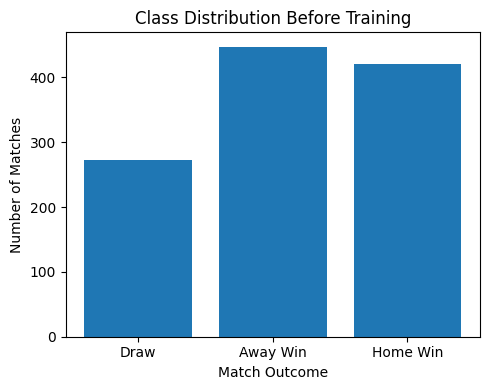

match_outcome
0.0    272
1.0    447
2.0    421
Name: count, dtype: int64


In [77]:
class_counts = y.value_counts().sort_index()

labels = ['Draw', 'Away Win', 'Home Win']

plt.figure(figsize=(5, 4))
plt.bar(labels, class_counts.values)
plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches')
plt.title('Class Distribution Before Training')
plt.tight_layout()
plt.show()

print(class_counts)

In [78]:
test_size = 0.2

In [79]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y
)

### LogisticRegression

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV

categorical_features = ['homeTeam_name', 'awayTeam_name']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

model = LogisticRegressionCV(
    cv=n_splits,
    solver='lbfgs',
    max_iter=1000,
    scoring='f1_macro'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [81]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

/Users/mihaicoretchi/repos/AIA/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1780: FutureWarning: The default value for l1_ratios will change from None to (0.0,) in version 1.10. From version 1.10 onwards, only array-like with values in [0, 1] will be allowed, None will be forbidden. To avoid this warning, explicitly set a value, e.g. l1_ratios=(0,).
  warnings.warn(
/Users/mihaicoretchi/repos/AIA/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1823: FutureWarning: The fitted attributes of LogisticRegressionCV will be simplified in scikit-learn 1.10 to remove redundancy. Set`use_legacy_attributes=False` to enable the new behavior now, or set it to `True` to silence this warning during the transition period while keeping the deprecated behavior for the time being. The default value of use_legacy_attributes will change from True to False in scikit-learn 1.10. See the docstring of LogisticRegressionCV for more details.
  warnings.warn(


In [82]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print(classification_report(
    y_test,
    y_pred,
    target_names=['Draw', 'Away Win', 'Home Win']
))

Accuracy : 0.4868421052631579
Precision: 0.4703611004150088
Recall   : 0.4509217374385914
F1-score : 0.442874144139967
Confusion Matrix:
 [[10 31 14]
 [12 47 30]
 [ 2 28 54]]
              precision    recall  f1-score   support

        Draw       0.42      0.18      0.25        55
    Away Win       0.44      0.53      0.48        89
    Home Win       0.55      0.64      0.59        84

    accuracy                           0.49       228
   macro avg       0.47      0.45      0.44       228
weighted avg       0.48      0.49      0.47       228



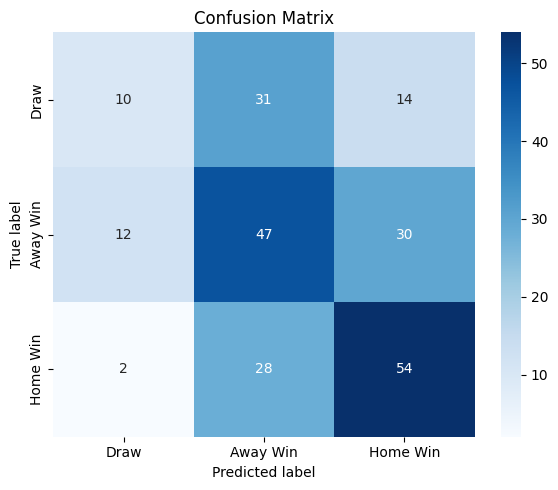

In [83]:
labels = ['Draw', 'Away Win', 'Home Win']

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### Multinomial naive bayes 

In [84]:
from sklearn.naive_bayes import MultinomialNB


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

In [85]:
from sklearn.model_selection import cross_validate

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

cross_validate(
    pipeline,
    X,
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)


{'fit_time': array([0.02218103, 0.01238918, 0.00835872, 0.00955796, 0.01119781]),
 'score_time': array([0.02880502, 0.024575  , 0.02199507, 0.01942706, 0.02394438]),
 'test_accuracy': array([0.46052632, 0.52192982, 0.46052632, 0.50438596, 0.5       ]),
 'test_precision': array([0.49379038, 0.52512272, 0.45032807, 0.49632713, 0.51164875]),
 'test_recall': array([0.44033513, 0.49686836, 0.43315697, 0.48059965, 0.47320914]),
 'test_f1': array([0.44810642, 0.5008809 , 0.43468806, 0.48312433, 0.47764882])}

In [86]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, average='macro', zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, average='macro', zero_division=0))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print(classification_report(
    y_test, y_pred,
    target_names=['Away Win', 'Draw', 'Home Win'],
    zero_division=0
))

Accuracy : 0.4868421052631579
Precision: 0.4522929596760606
Recall   : 0.4467370332538872
F1-score : 0.43306711503432815
Confusion Matrix:
 [[ 8 33 14]
 [13 47 29]
 [ 2 26 56]]
              precision    recall  f1-score   support

    Away Win       0.35      0.15      0.21        55
        Draw       0.44      0.53      0.48        89
    Home Win       0.57      0.67      0.61        84

    accuracy                           0.49       228
   macro avg       0.45      0.45      0.43       228
weighted avg       0.47      0.49      0.46       228



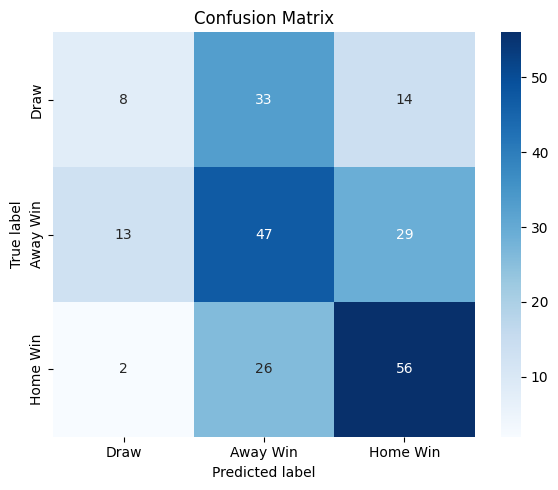

In [87]:
labels = ['Draw', 'Away Win', 'Home Win']

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### Linear Support Vector Classification

In [88]:
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearSVC(random_state=random_state))
])

cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

cross_validate(
    pipeline,
    X,
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

{'fit_time': array([0.01846504, 0.00921011, 0.01277184, 0.01128697, 0.01063204]),
 'score_time': array([0.03004909, 0.02214789, 0.02183414, 0.02073812, 0.0210309 ]),
 'test_accuracy': array([0.47368421, 0.51315789, 0.46929825, 0.5       , 0.48684211]),
 'test_precision': array([0.48195489, 0.51523297, 0.45943602, 0.48814229, 0.48597313]),
 'test_recall': array([0.45709341, 0.49445417, 0.4452381 , 0.48209877, 0.46682823]),
 'test_f1': array([0.46137124, 0.4970676 , 0.44790765, 0.48335593, 0.47073325])}

In [89]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

Accuracy : 0.4868421052631579
Precision: 0.46485472076619433
Recall : 0.4513676086709794
F1-score : 0.44194491605357483
Confusion Matrix:
 [[10 30 15]
 [13 45 31]
 [ 2 26 56]]
              precision    recall  f1-score   support

        Draw       0.40      0.18      0.25        55
    Away Win       0.45      0.51      0.47        89
    Home Win       0.55      0.67      0.60        84

    accuracy                           0.49       228
   macro avg       0.46      0.45      0.44       228
weighted avg       0.47      0.49      0.47       228



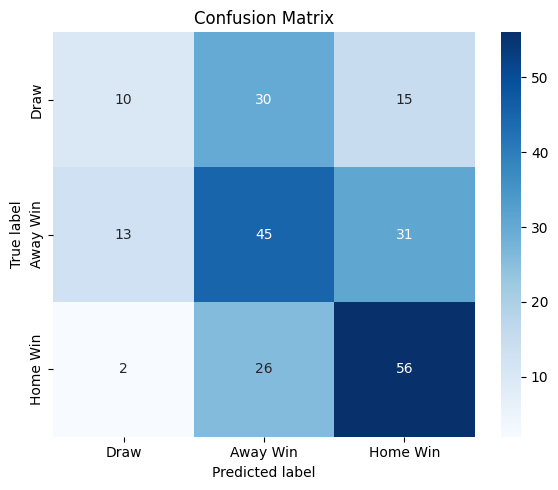

In [90]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Recall :", recall_score(y_test, y_pred, average='macro', zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, average='macro', zero_division=0))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

labels = ['Draw', 'Away Win', 'Home Win']

print(classification_report(
    y_test, y_pred,
    target_names=labels,
    zero_division=0
))

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### Random forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=random_state,
    n_jobs=-1,
    class_weight='balanced_subsample'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

cross_validate(
    pipeline,
    X, y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


Accuracy : 0.4649122807017544
Precision: 0.4515137855908647
Recall   : 0.45147218574184866
F1-score : 0.45108863521355386
Confusion Matrix:
 [[19 22 14]
 [20 40 29]
 [12 25 47]]
              precision    recall  f1-score   support

        Draw       0.37      0.35      0.36        55
    Away Win       0.46      0.45      0.45        89
    Home Win       0.52      0.56      0.54        84

    accuracy                           0.46       228
   macro avg       0.45      0.45      0.45       228
weighted avg       0.46      0.46      0.46       228



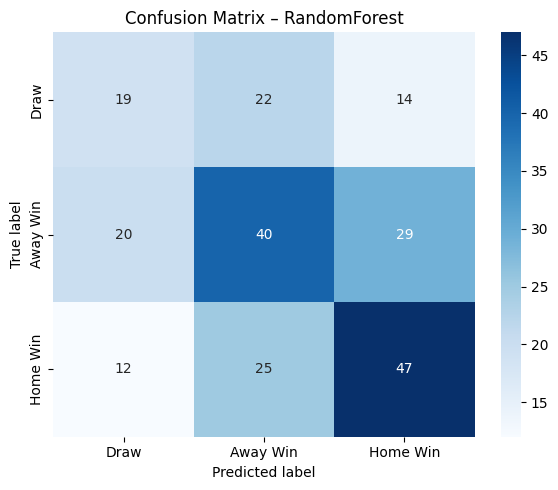

In [92]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, average='macro', zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, average='macro', zero_division=0))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

labels = ['Draw', 'Away Win', 'Home Win']
print(classification_report(y_test, y_pred, target_names=labels, zero_division=0))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix – RandomForest')
plt.tight_layout()
plt.show()